In [1]:
import xarray as xr
import pytide
%matplotlib inline

Load tide gauge data SOEST [website](https://uhslc.soest.hawaii.edu/datainfo/)

In [2]:
url = "http://uhslc.soest.hawaii.edu/thredds/dodsC/uhslc/rqh/OS_UH-RQH347A_20160323_D"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:                                   (depth: 1, latitude: 1, longitude: 1, time: 412008)
Coordinates:
  * time                                      (time) datetime64[ns] 1968-01-01 ... 2014-12-31T22:59:59.999731
  * depth                                     (depth) float32 0.0
  * latitude                                  (latitude) float32 44.017
  * longitude                                 (longitude) float32 144.283
Data variables:
    sea_surface_height_above_reference_level  (time, depth, latitude, longitude) float32 ...
    sensor_type_code                          (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:                     CF-1.5, OceanSITES 1.2, TideGauge-0.2
    title:                           Sea Level Time Series (HOURLY)
    naming_authority:                OceanSITES
    id:                              OS_UH-RQH347A_20160323_D
    processing_level:                Research Quality
    quality_control_level:   

/Users/aponte/.miniconda3/envs/sandbox/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


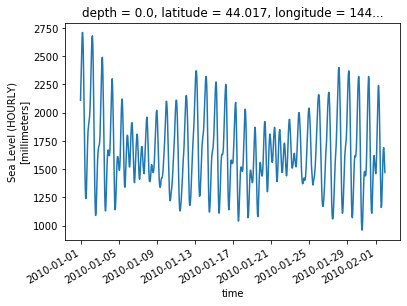

In [3]:
ds['sea_surface_height_above_reference_level'].sel(time=slice('2010-01-01','2010-02-01')).plot()

In [4]:
wt = pytide.WaveTable()

In [5]:
wt

pytide.WaveTable(O1, P1, K1, 2N2, Mu2, N2, Nu2, M2, L2, T2, S2, K2, M4, S1, Q1, Mm, Mf, Mtm, Msqm, Eps2, Lambda2, Eta2, 2Q1, Sigma1, Rho1, M11, M12, Chi1, Pi1, Phi1, Theta1, J1, OO1, M3, M6, MN4, MS4, N4, R2, R4, S4, MNS2, M13, MK4, SN4, SK4, 2MN6, 2MS6, 2MK6, MSN6, 2SM6, MSK6, MP1, 2SM2, Psi1, 2MS2, MKS2, 2MN2, MSN2, MO3, 2MK3, MK3, S6, M8, MSf, Ssa, Sa)

In [6]:
print(wt.freq())

{'O1': 6.759774402932076e-05, 'P1': 7.252294578562199e-05, 'K1': 7.29211585472388e-05, '2N2': 0.00013524049655470524, 'Mu2': 0.00013559370082025834, 'N2': 0.0001378796995656324, 'Nu2': 0.0001382329038311855, 'M2': 0.00014051890257655957, 'L2': 0.0001431581055874867, 'T2': 0.00014524500745917898, 'S2': 0.0001454441043328608, 'K2': 0.0001458423170944776, 'M4': 0.00028103780515311913, 'S1': 7.27220521664304e-05, 'Q1': 6.495854101839362e-05, 'Mm': 2.6392030109271514e-06, 'Mf': 5.323414517918014e-06, 'Mtm': 7.962617528845167e-06, 'Msqm': 1.0248616274219237e-05, 'Eps2': 0.00013295449780933118, 'Lambda2': 0.00014280490132193363, 'Eta2': 0.00014848152010540474, '2Q1': 6.231933800746648e-05, 'Sigma1': 6.267254227301955e-05, 'Rho1': 6.53117452839467e-05, 'M11': 7.028195553631163e-05, 'M12': 7.023694704024792e-05, 'Chi1': 7.063515980186472e-05, 'Pi1': 7.23238489119402e-05, 'Phi1': 7.331937130885558e-05, 'Theta1': 7.520715729261285e-05, 'J1': 7.556036155816595e-05, 'OO1': 7.824457306515683e-05, 'M

In [7]:
type(ds.time.values.astype("datetime64[s]").astype("float64"))

numpy.ndarray

In [8]:
pytide.__file__

'/Users/aponte/code/pangeo-pytide/src/pytide/__init__.py'

In [9]:
f, vu = wt.compute_nodal_corrections(ds.time.values.astype("datetime64[s]").astype("float64"))

f, vu should be xarrays

In [10]:
f.shape

(67, 412008)

In [11]:
ds.sea_surface_height_above_reference_level.data.shape

(412008, 1, 1, 1)

In [12]:
w = wt.harmonic_analysis(ds.sea_surface_height_above_reference_level.data.squeeze(), f, vu)

One should be able to pass xarray to harmonic analysis

One should not have to squeeze data

In [13]:
w

{'O1': (nan+nanj),
 'P1': (nan+nanj),
 'K1': (nan+nanj),
 '2N2': (nan+nanj),
 'Mu2': (nan+nanj),
 'N2': (nan+nanj),
 'Nu2': (nan+nanj),
 'M2': (nan+nanj),
 'L2': (nan+nanj),
 'T2': (nan+nanj),
 'S2': (nan+nanj),
 'K2': (nan+nanj),
 'M4': (nan+nanj),
 'S1': (nan+nanj),
 'Q1': (nan+nanj),
 'Mm': (nan+nanj),
 'Mf': (nan+nanj),
 'Mtm': (nan+nanj),
 'Msqm': (nan+nanj),
 'Eps2': (nan+nanj),
 'Lambda2': (nan+nanj),
 'Eta2': (nan+nanj),
 '2Q1': (nan+nanj),
 'Sigma1': (nan+nanj),
 'Rho1': (nan+nanj),
 'M11': (nan+nanj),
 'M12': (nan+nanj),
 'Chi1': (nan+nanj),
 'Pi1': (nan+nanj),
 'Phi1': (nan+nanj),
 'Theta1': (nan+nanj),
 'J1': (nan+nanj),
 'OO1': (nan+nanj),
 'M3': (nan+nanj),
 'M6': (nan+nanj),
 'MN4': (nan+nanj),
 'MS4': (nan+nanj),
 'N4': (nan+nanj),
 'R2': (nan+nanj),
 'R4': (nan+nanj),
 'S4': (nan+nanj),
 'MNS2': (nan+nanj),
 'M13': (nan+nanj),
 'MK4': (nan+nanj),
 'SN4': (nan+nanj),
 'SK4': (nan+nanj),
 '2MN6': (nan+nanj),
 '2MS6': (nan+nanj),
 '2MK6': (nan+nanj),
 'MSN6': (nan+nanj),


NaN's should be treated correctly

In [14]:
ds = ds.dropna('time')

In [15]:
f, vu = wt.compute_nodal_corrections(ds.time)
#f, vu = f.T, vu.T  # The matrices must be transposed.
w = wt.harmonic_analysis(ds.sea_surface_height_above_reference_level.data.squeeze(), f, vu)

In [18]:
w

{'O1': (0.05826769228775294+0.827139735436489j),
 'P1': (-0.3392006834563835+0.15141703097428408j),
 'K1': (0.2897849217366491-0.5535928576905528j),
 '2N2': (-0.6010351496434746-0.2886220530975104j),
 'Mu2': (36.67023638520106-2.1068800009425055j),
 'N2': (-0.08263767581369692+0.38408812206188603j),
 'Nu2': (0.26129032138267433+0.05440942336205032j),
 'M2': (-26.68706415405124+6.6386251958998415j),
 'L2': (1.80420118947107-0.09820615572896856j),
 'T2': (0.08452273218956179-0.7047591861686848j),
 'S2': (-194.39363894001+17398.77964888269j),
 'K2': (0.5425232619913719+0.5528555212809521j),
 'M4': (-1.0221187506390155-0.32357491342928235j),
 'S1': (-24564.369409587805-1428.5485290193164j),
 'Q1': (-1.275043607542057+0.8095509325090344j),
 'Mm': (-0.13104986362390228-0.8145599679436042j),
 'Mf': (-0.09896549978415481-0.21392157833899872j),
 'Mtm': (0.2447823514417595-0.7132750388177455j),
 'Msqm': (-0.07012837262448472+0.3840725328095257j),
 'Eps2': (9.296538447041218+28.299225586959114j),

Hum, what do these complex number correpond to?
Is it explained in the doc?

In [17]:
tide = wt.tide_from_time_series(ds.time, w)

One should be able to pass datetime object to tide_from_mapping